In [38]:
import random

import numpy as np

import igraph as ig

import networkx as nx
from timeit import default_timer 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

In [28]:
graph = nx.gnm_random_graph(100, 500, seed=0)
weights = np.random.randint(100, size=500)

weights_matrix = np.zeros((500, 500 ))

for i, item in enumerate(graph.edges()):
    graph[item[0]][item[1]]['w'] = weights[i]
    graph[item[1]][item[0]]['w'] = weights[i]



{(0, 78): Text(0.2897458654103646, 0.00041934712206759435, '75'),
 (0, 76): Text(0.09646448505666319, -0.01515332587501399, '45'),
 (0, 4): Text(0.10706887357116242, 0.13572276074952286, '31'),
 (0, 40): Text(0.2019149239649966, -0.18636886977696934, '78'),
 (0, 86): Text(0.022553942213818224, -0.08942066438403797, '79'),
 (0, 84): Text(-0.2766104515490057, -0.10762977944708876, '53'),
 (0, 26): Text(-0.24009256243464971, -0.11659757829980937, '85'),
 (0, 95): Text(0.03429164197366705, 0.17596848011367416, '91'),
 (0, 37): Text(0.08337515621465288, 0.04571603574981169, '19'),
 (0, 27): Text(-0.023382965846333894, 0.27707582974842143, '32'),
 (0, 5): Text(-0.08696723570364556, 0.05503846824565169, '73'),
 (0, 46): Text(-0.3001512969345321, -0.08271906129927022, '39'),
 (0, 79): Text(0.26201593743010093, 0.05200812745513464, '31'),
 (1, 70): Text(-0.23714803166049636, 0.338539778907202, '96'),
 (1, 60): Text(-0.1235708635770674, -0.06940306801136098, '1'),
 (1, 88): Text(-0.3304823073727

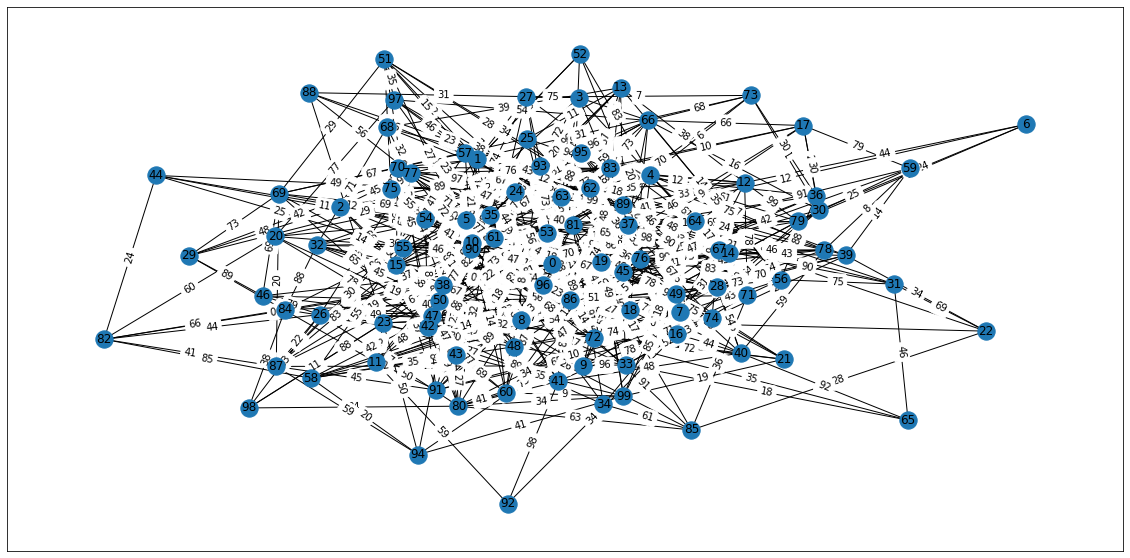

In [33]:
pos = nx.spring_layout(graph)  # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(graph, pos)
labels = nx.get_edge_attributes(graph, 'w')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)


In [39]:


def measure_time_dijkstra(n_experiments,  g, source, to):
    result = []
    for i in range(n_experiments):
        start = default_timer()
        nx.algorithms.shortest_paths.weighted.dijkstra_path(
            g, source, to, 'w')
        result.append(default_timer() - start)

    return np.array(result).mean()


def measure_time_bellman(n_experiments,g,source,to):
    result = []
    for i in range(n_experiments):
          start = default_timer()
          nx.algorithms.shortest_paths.weighted.bellman_ford_path(
              g, source, to, 'w')
          result.append(default_timer() - start)

    return np.array(result).mean()


print('Dijkstra time {:.6f}'.format(measure_time_dijkstra(
    10,  graph, 2, 69)))
print('Bellman-Ford time {:.6f}'.format(measure_time_bellman(10,
      graph, 2, 69)))


Dijkstra time 0.000680
Bellman-Ford time 0.003403


[0.0006460000004153699, 0.0005437999998321175, 0.0005460000002130982, 0.0005406000000220956, 0.00054439999985334]
[(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8), (3, 9), (3, 10), (4, 10), (5, 10), (6, 10), (7, 10), (8, 10), (9, 10)]


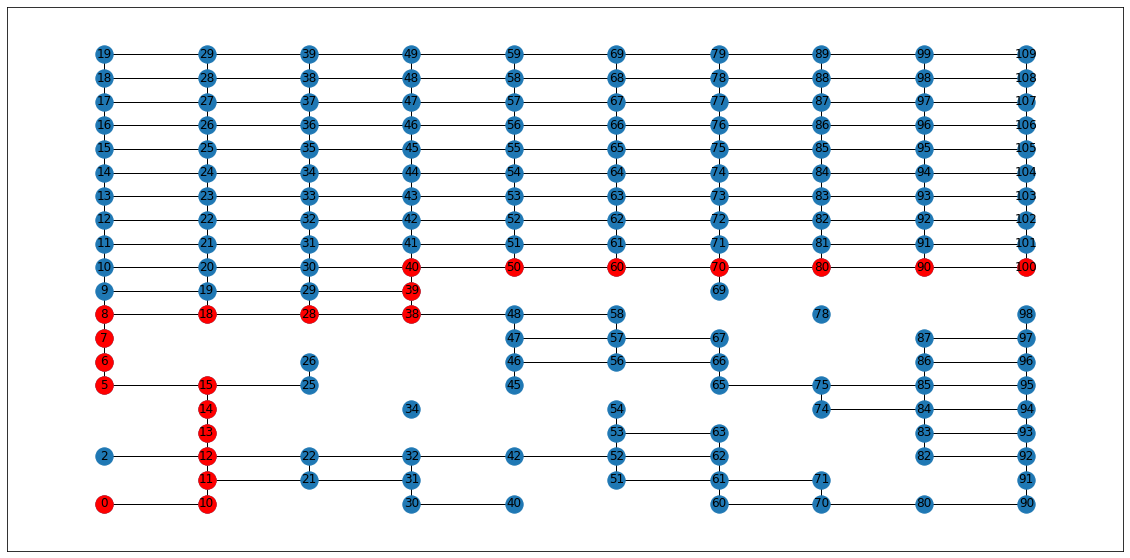

In [54]:
np.random.seed(0)

graph_grid = nx.grid_2d_graph(10, 20)

graph_grid.remove_nodes_from(list(
    map(tuple, np.random.randint(0, 10, size=(40, 2)))))

pos = dict((n, n) for n in graph_grid.nodes())

labels = dict(((i, j), i * 10 + j) for i, j in graph_grid.nodes())
nx.draw_networkx(graph_grid, pos=pos, labels=labels)

times = []
for i in range(5):
          start = default_timer()
          nx.algorithms.shortest_paths.astar.astar_path(
              graph_grid, (0, 0), (9, 10))
          times.append(default_timer() - start)

print(times.mean())
path = nx.algorithms.shortest_paths.astar.astar_path(graph_grid, (0, 0), (9,10))
print(path)
nx.draw_networkx_nodes(graph_grid, pos, nodelist=path, node_color='r')
